Plant Disease Prediction

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [22]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [26]:
pip show tensorflow


Name: tensorflow
Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\acer\appdata\roaming\python\python310\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip show matplotlib


Name: matplotlib
Version: 3.8.4
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\acer\anaconda3\envs\py310\lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn
Note: you may need to restart the kernel to use updated packages.


In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'D:\PLANT DIESEASE SAP PROJECT\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'D:\PLANT DIESEASE SAP PROJECT\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


Building Model

In [11]:
model = tf.keras.models.Sequential()

Building Convolution Layer

In [12]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(tf.keras.layers.Dropout(0.25))

In [18]:
model.add(tf.keras.layers.Flatten())

In [19]:
model.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [20]:
model.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [21]:
model.add(tf.keras.layers.Dense(units=38,activation='softmax'))

Compiling and Training Phase

In [22]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [40]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
2197/2197 [==============================] - 214s 96ms/step - loss: 1.3765 - accuracy: 0.5967 - val_loss: 0.5774 - val_accuracy: 0.8248
Epoch 2/50
2197/2197 [==============================] - 199s 91ms/step - loss: 0.4560 - accuracy: 0.8562 - val_loss: 0.2798 - val_accuracy: 0.9101
Epoch 3/50
2197/2197 [==============================] - 174s 79ms/step - loss: 0.2785 - accuracy: 0.9092 - val_loss: 0.2213 - val_accuracy: 0.9287
Epoch 4/50
2197/2197 [==============================] - 174s 79ms/step - loss: 0.1863 - accuracy: 0.9392 - val_loss: 0.1761 - val_accuracy: 0.9412
Epoch 5/50
2197/2197 [==============================] - 174s 79ms/step - loss: 0.1414 - accuracy: 0.9543 - val_loss: 0.1526 - val_accuracy: 0.9507
Epoch 6/50
2197/2197 [==============================] - 174s 79ms/step - loss: 0.1112 - accuracy: 0.9627 - val_loss: 0.1400 - val_accuracy: 0.9573
Epoch 7/50
2197/2197 [==============================] - 174s 79ms/step - loss: 0.0871 - accuracy: 0.9715 - val_loss: 0

Evaluating Model

In [41]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 54s 25ms/step - loss: 0.0016 - accuracy: 0.9996
Training accuracy: 0.9995589852333069


In [42]:
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 14s 25ms/step - loss: 0.0655 - accuracy: 0.9833
Validation accuracy: 0.983325719833374


Saving Model

In [43]:
model.save('trained_plant_disease0007.keras')

In [44]:
training_history.history

{'loss': [1.3764722347259521,
  0.4560168385505676,
  0.2784808874130249,
  0.18633119761943817,
  0.14140598475933075,
  0.11121507734060287,
  0.08714213222265244,
  0.07624537497758865,
  0.06324226409196854,
  0.05889597907662392,
  0.04799292981624603,
  0.04597320407629013,
  0.04243558645248413,
  0.04028598219156265,
  0.03520315885543823,
  0.033833034336566925,
  0.030401933938264847,
  0.03050200082361698,
  0.027651477605104446,
  0.0276777446269989,
  0.025325320661067963,
  0.024616165086627007,
  0.023457476869225502,
  0.02273506298661232,
  0.022446293383836746,
  0.020765380933880806,
  0.02103932574391365,
  0.019145887345075607,
  0.01961454004049301,
  0.019035901874303818,
  0.01678808592259884,
  0.018376866355538368,
  0.02067713439464569,
  0.015121744945645332,
  0.01821841672062874,
  0.01456429436802864,
  0.017708277329802513,
  0.016326308250427246,
  0.012536038644611835,
  0.01547892764210701,
  0.015887057408690453,
  0.012468989938497543,
  0.013534123

In [45]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [46]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Accuracy Visualization

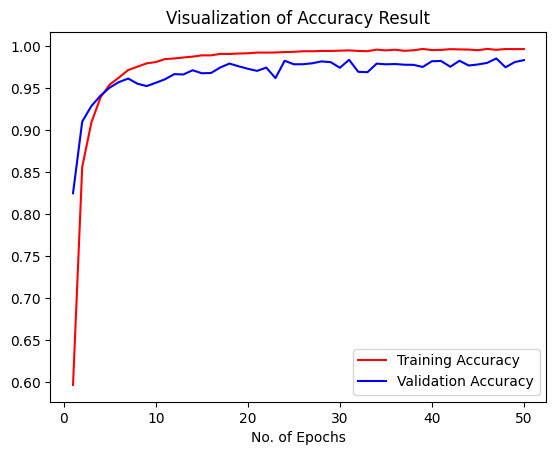

In [48]:
import matplotlib.pyplot as plt

epochs = range(1, 51)  # Adjusted to cover all 50 epochs
training_accuracy = training_history.history['accuracy']
validation_accuracy = training_history.history['val_accuracy']

plt.plot(epochs, training_accuracy, color='red', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


Some other metrics for model evaluation

In [59]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [50]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'D:\PLANT DIESEASE SAP PROJECT\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [51]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 88s 5ms/step


In [52]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [53]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [54]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [55]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [56]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.99      0.99       504
                                 Apple___Black_rot       1.00      1.00      1.00       497
                          Apple___Cedar_apple_rust       1.00      0.99      0.99       440
                                   Apple___healthy       1.00      0.97      0.98       502
                               Blueberry___healthy       0.99      0.99      0.99       454
          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.99      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

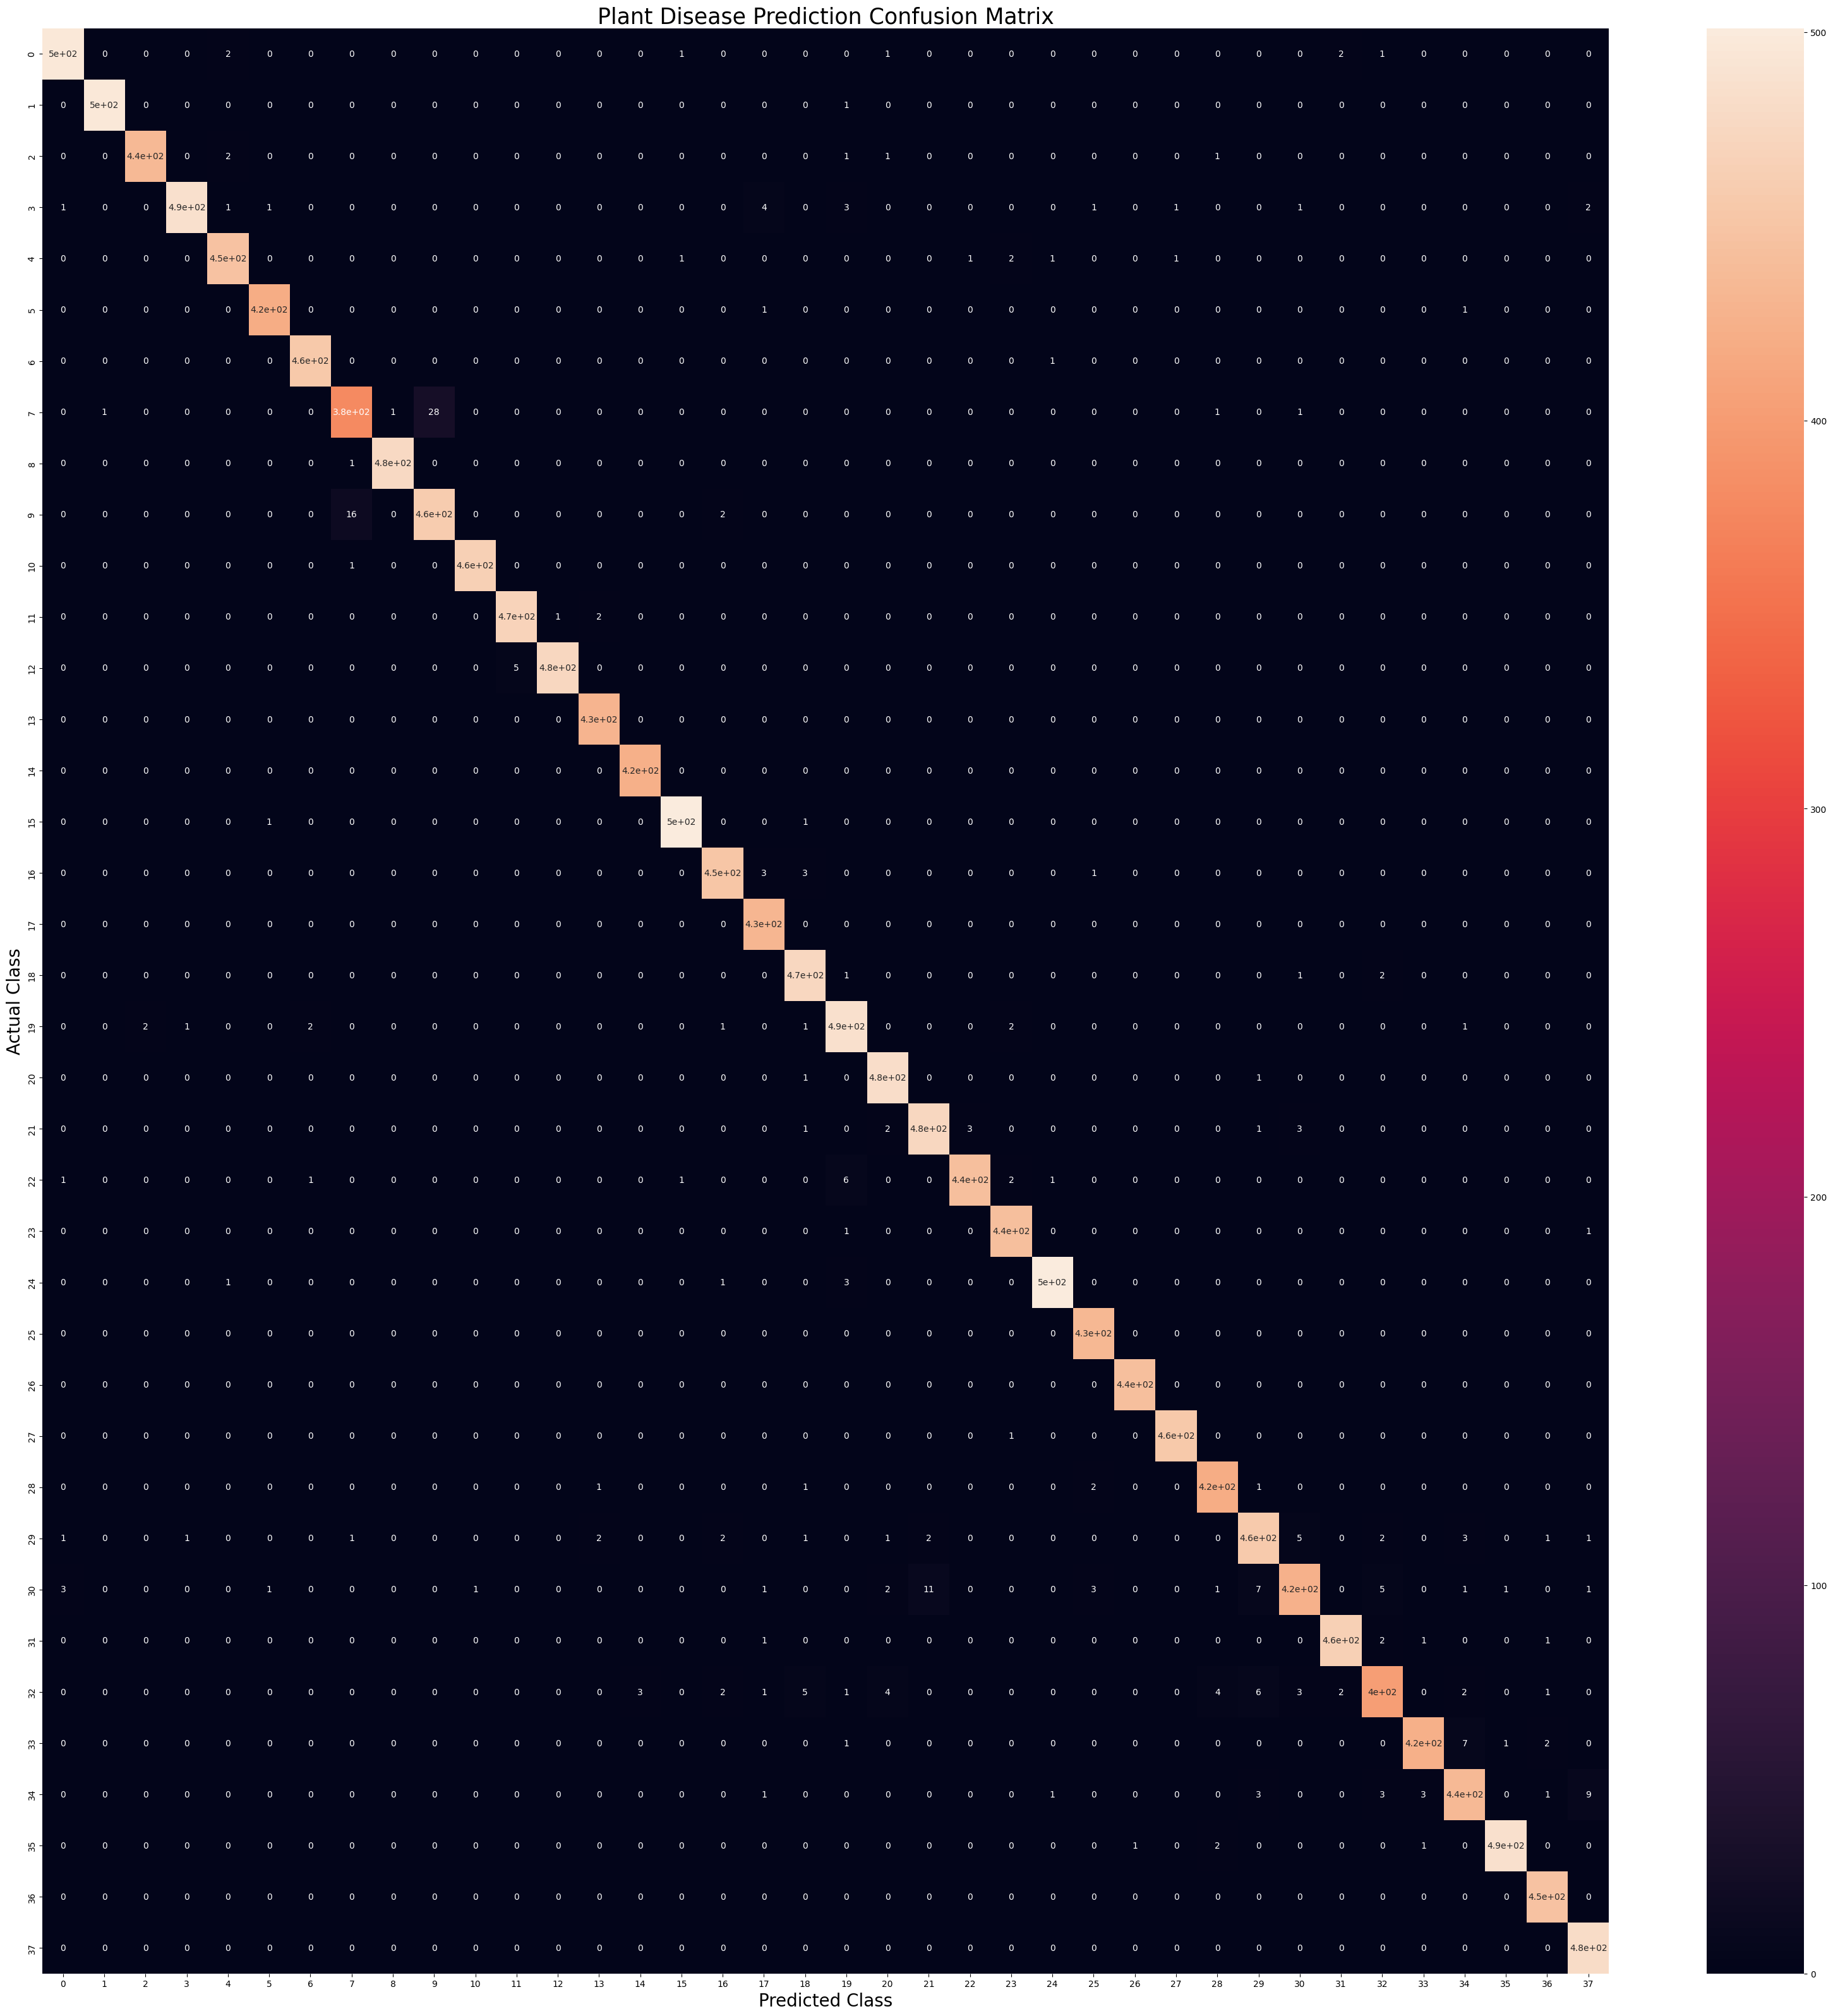

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)
plt.show()
